# Python Pandas Tutorial

This notebook is base on this [article](https://www.learndatasci.com/tutorials/python-pandas-tutorial-complete-introduction-for-beginners/).

In [317]:
import pandas as pd
import matplotlib.pyplot as plt

In [318]:
data = {
    "apples":  [3, 2, 0, 1],
    "oranges": [0, 3, 7, 2],
}

purchases = pd.DataFrame(data)
purchases

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


In [319]:
purchases = pd.DataFrame(data, index=["June", "Robert", "Lily", "David"])
purchases

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


We could locate a customer's order by using their name

In [320]:
purchases.loc['June']

apples     3
oranges    0
Name: June, dtype: int64

Load data from a CSV file

In [321]:
purchases = pd.read_csv("data/purchases.csv")
purchases

,Unnamed: 0,apples,oranges
0,June,3,0
1,Robert,2,3
2,Lily,0,7
3,David,1,2


In [322]:
purchases= pd.read_csv("data/purchases.csv", index_col=0)
purchases

,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


Load data from JSON file

In [323]:
purchases = pd.read_json("data/purchases.json")
purchases

,apples,oranges
June,3,1
Robert,2,2
Lily,4,0
David,1,3


In [324]:
import sqlite3

con = sqlite3.connect("data/database.db")
purchases = pd.read_sql_query("SELECT * FROM purchases;", con, index_col="name")
purchases

,id,oranges,apples
name,,,
June,1,1,3
Robert,2,2,2
Lily,3,0,4
David,4,3,1


In [325]:
movies_df = pd.read_csv("data/imdb-movie-data.csv", index_col="Title")

In [326]:
movies_df.head()

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [327]:
movies_df.tail(2)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Search Party,999,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
Nine Lives,1000,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [328]:
movies_df.loc["Prometheus"]

Rank                                                                  2
Genre                                          Adventure,Mystery,Sci-Fi
Description           Following clues to the origin of mankind, a te...
Director                                                   Ridley Scott
Actors                Noomi Rapace, Logan Marshall-Green, Michael Fa...
Year                                                               2012
Runtime (Minutes)                                                   124
Rating                                                              7.0
Votes                                                            485820
Revenue (Millions)                                               126.46
Metascore                                                          65.0
Name: Prometheus, dtype: object

Getting info about data

In [329]:
movies_df.info()
movies_df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 126.0+ KB


(1000, 11)

In [330]:
temp_df = pd.concat([movies_df, movies_df])
temp_df.shape

(2000, 11)

In [331]:
temp_df.drop_duplicates(inplace=True)
temp_df.shape

(1000, 11)

In [332]:
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [333]:
movies_df.rename(columns={
    "Runtime (Minutes)": "runtime",
    "Revenue (Millions)": "revenue_millions",
}, inplace=True)
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'runtime',
       'Rating', 'Votes', 'revenue_millions', 'Metascore'],
      dtype='object')

In [334]:
movies_df.columns = [col.lower() for col in movies_df]
movies_df.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

In [335]:
movies_df.isnull().sum()

rank                  0
genre                 0
description           0
director              0
actors                0
year                  0
runtime               0
rating                0
votes                 0
revenue_millions    128
metascore            64
dtype: int64

In [336]:
movies_df.dropna()

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...
Resident Evil: Afterlife,994,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
Project X,995,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0


In [337]:
movies_df.dropna(axis=1)

,rank,genre,description,director,actors,year,runtime,rating,votes
Title,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727
...,...,...,...,...,...,...,...,...,...
Secret in Their Eyes,996,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152
Step Up 2: The Streets,998,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699


In [338]:
revenue = movies_df["revenue_millions"]
revenue.head(10)


Title
Guardians of the Galaxy    333.13
Prometheus                 126.46
Split                      138.12
Sing                       270.32
Suicide Squad              325.02
The Great Wall              45.13
La La Land                 151.06
Mindhorn                      NaN
The Lost City of Z           8.01
Passengers                 100.01
Name: revenue_millions, dtype: float64

In [339]:
revenue_mean = revenue.mean()
revenue_mean

82.95637614678898

In [340]:
revenue.fillna(revenue_mean, inplace=True)
revenue.head(10)

Title
Guardians of the Galaxy    333.130000
Prometheus                 126.460000
Split                      138.120000
Sing                       270.320000
Suicide Squad              325.020000
The Great Wall              45.130000
La La Land                 151.060000
Mindhorn                    82.956376
The Lost City of Z           8.010000
Passengers                 100.010000
Name: revenue_millions, dtype: float64

In [341]:
movies_df.isnull().sum()

rank                 0
genre                0
description          0
director             0
actors               0
year                 0
runtime              0
rating               0
votes                0
revenue_millions     0
metascore           64
dtype: int64

In [342]:
movies_df["genre"].value_counts()

Action,Adventure,Sci-Fi    50
Drama                      48
Comedy,Drama,Romance       35
Comedy                     32
Drama,Romance              31
                           ..
Action,Comedy,Family        1
Action,Crime,Fantasy        1
Comedy,Mystery              1
Adventure,Comedy,Horror     1
Comedy,Family,Fantasy       1
Name: genre, Length: 207, dtype: int64

In [343]:
movies_df.corr()

,rank,year,runtime,rating,votes,revenue_millions,metascore
rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.252996,-0.191869
year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.117562,-0.079305
runtime,-0.221739,-0.164900,1.000000,0.392214,0.407062,0.247834,0.211978
rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.189527,0.631897
votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.607941,0.325684
revenue_millions,-0.252996,-0.117562,0.247834,0.189527,0.607941,1.000000,0.133328
metascore,-0.191869,-0.079305,0.211978,0.631897,0.325684,0.133328,1.000000


In [344]:
genre_col = movies_df["genre"]
type(genre_col)

pandas.core.series.Series

In [345]:
subset = movies_df[["genre", "rating"]]
subset.head(10)

,genre,rating
Title,,
Guardians of the Galaxy,"Action,Adventure,Sci-Fi",8.1
Prometheus,"Adventure,Mystery,Sci-Fi",7.0
Split,"Horror,Thriller",7.3
Sing,"Animation,Comedy,Family",7.2
Suicide Squad,"Action,Adventure,Fantasy",6.2
The Great Wall,"Action,Adventure,Fantasy",6.1
La La Land,"Comedy,Drama,Music",8.3
Mindhorn,Comedy,6.4
The Lost City of Z,"Action,Adventure,Biography",7.1


In [346]:
subset["rating"].max()
max_rate = subset[(subset["rating"] >= 8) & subset["genre"].str.contains("Sci-Fi")]
max_rate

,genre,rating
Title,,
Guardians of the Galaxy,"Action,Adventure,Sci-Fi",8.1
Arrival,"Drama,Mystery,Sci-Fi",8.0
Interstellar,"Adventure,Drama,Sci-Fi",8.6
The Prestige,"Drama,Mystery,Sci-Fi",8.5
Mad Max: Fury Road,"Action,Adventure,Sci-Fi",8.1
The Avengers,"Action,Sci-Fi",8.1
Inception,"Action,Adventure,Sci-Fi",8.8
The Martian,"Adventure,Drama,Sci-Fi",8.0
Star Trek,"Action,Adventure,Sci-Fi",8.0


In [355]:
movies_df["rating_category"] = movies_df["rating"].apply(lambda x: "Good" if x >= 8 else "Bad")

In [356]:
plt.rcParams.update({'font.size': 20, 'figure.figsize': (20, 16)})

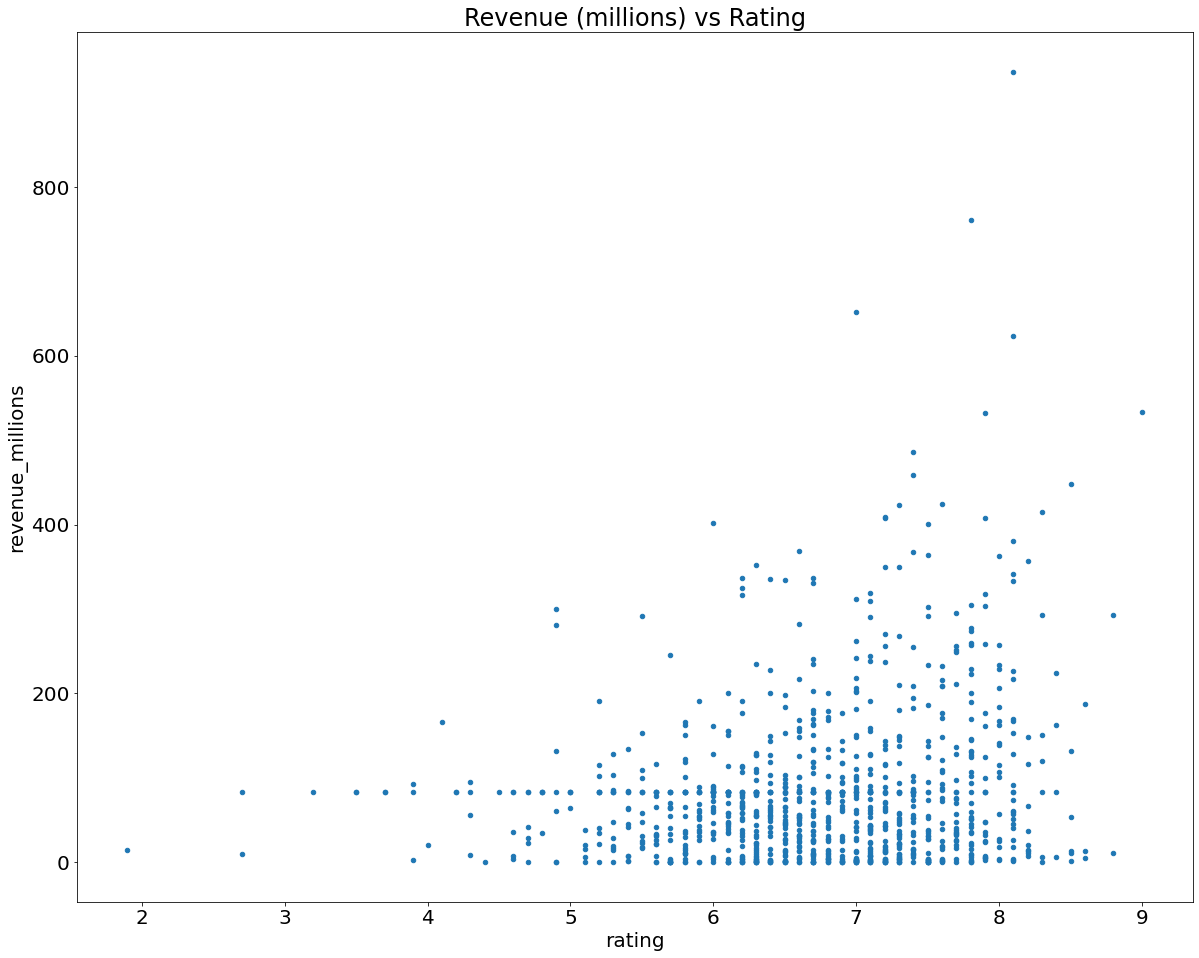

In [357]:
movies_df.plot(kind='scatter', x='rating', y='revenue_millions', title='Revenue (millions) vs Rating');

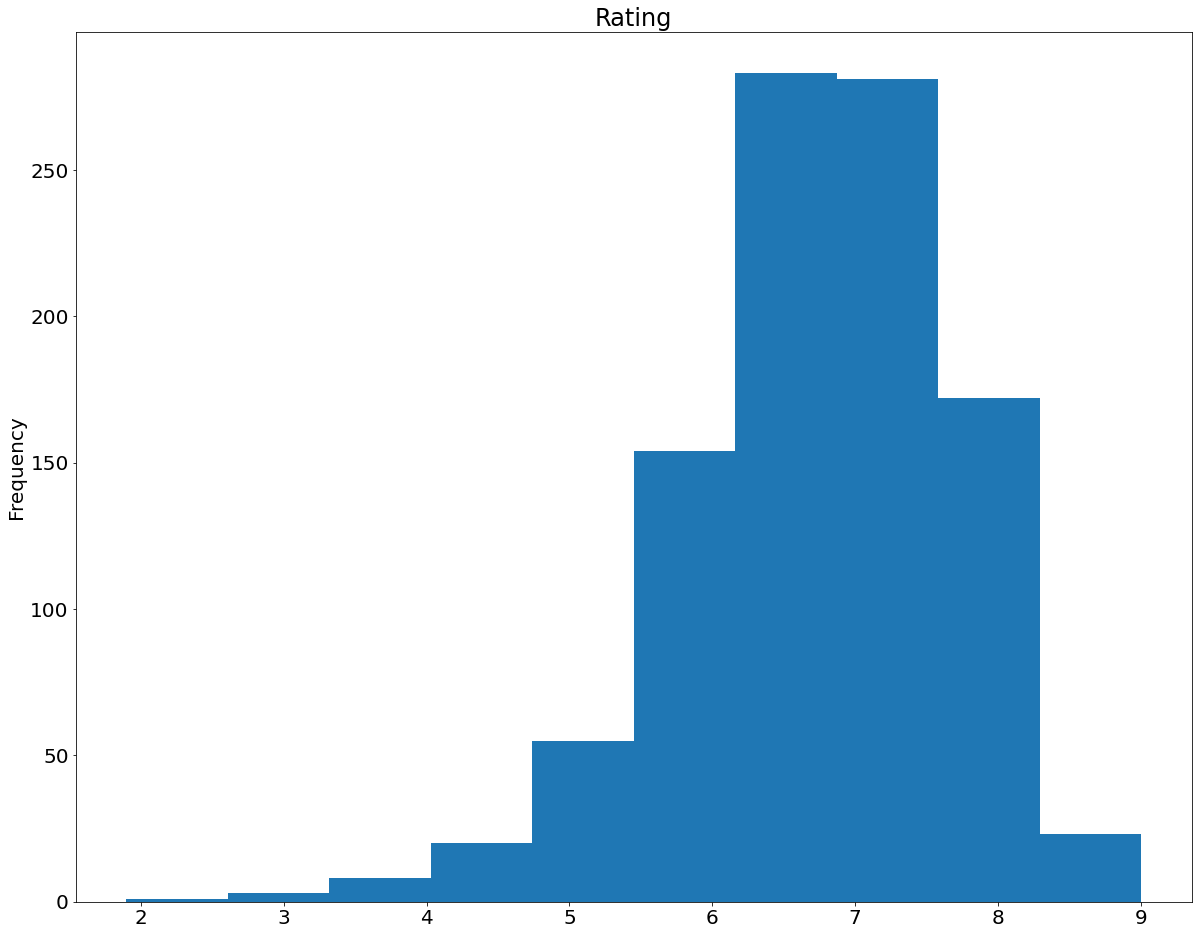

In [358]:
movies_df['rating'].plot(kind='hist', title='Rating');

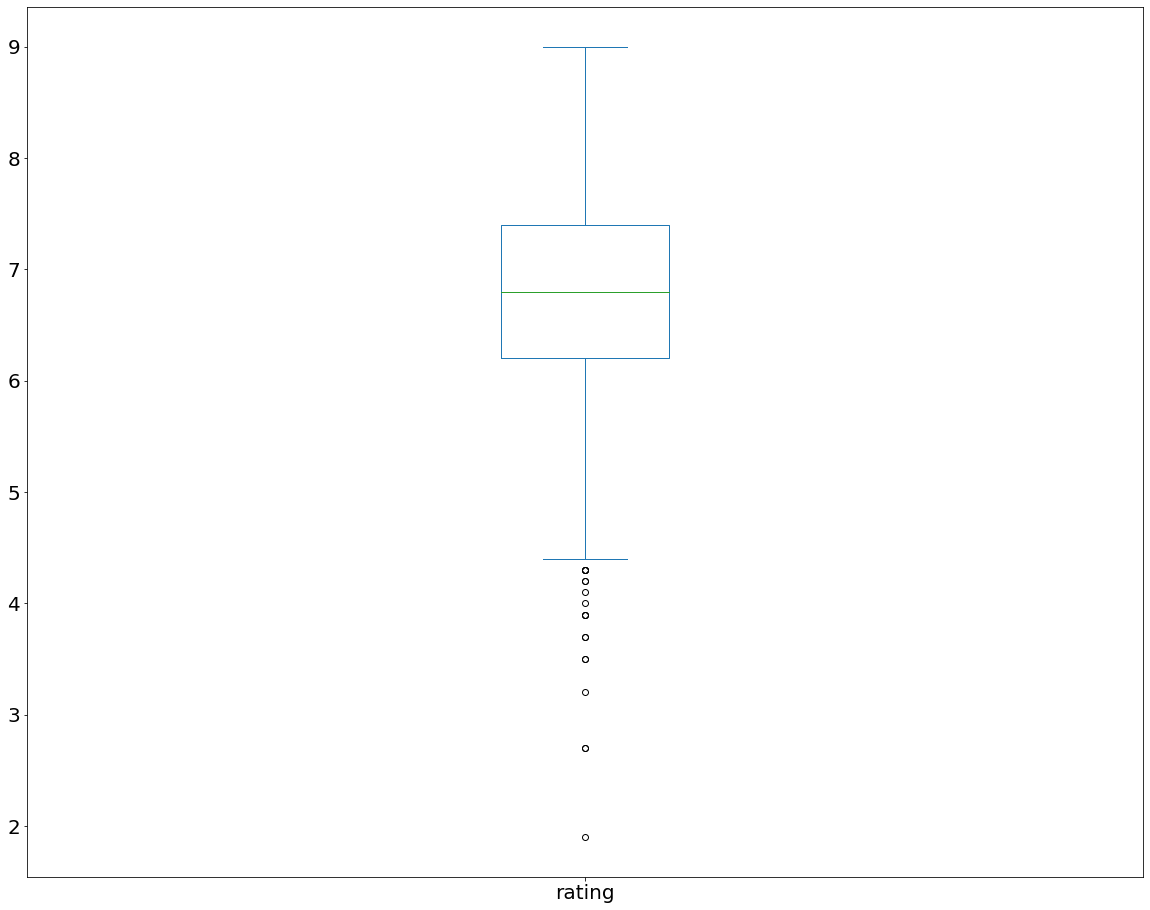

In [359]:
movies_df['rating'].plot(kind="box");